In [1]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [5]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# fill missing years with the median year
median_year = int(df['Year'].median())
df['Year']=df['Year'].fillna(median_year)

print('\nAfter cleaning, missing values:')
print(df.isnull().sum())

# Removing any duplicate rows
df.drop_duplicates(inplace=True)


After cleaning, missing values:
Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64


In [6]:
df = df.dropna()
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [7]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [8]:
df[df['Global_Sales']> 10.0].count()

,0
Rank,62
Name,62
Platform,62
Year,62
Genre,62
Publisher,62
NA_Sales,62
EU_Sales,62
JP_Sales,62
Other_Sales,62


In [9]:
grouped_sales = df.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False)
grouped_sales_10 = df.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(10)
grouped_sales_10

,Global_Sales
Name,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.82
Wii Sports Resort,33.00
Pokemon Red/Pokemon Blue,31.37
Call of Duty: Black Ops,31.03
Call of Duty: Modern Warfare 3,30.83


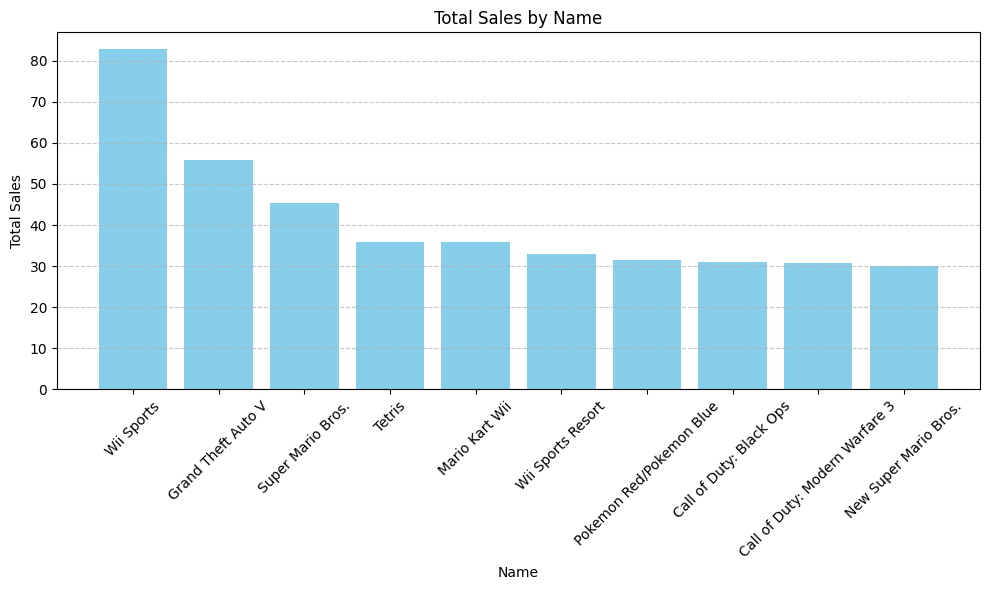

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_sales_10.index, grouped_sales_10.values, color='skyblue')

plt.title('Total Sales by Name')
plt.xlabel('Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate names if they're long
plt.tight_layout()       # Adjust layout to avoid label cutoff
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [11]:
top_publisher = df['Publisher'].value_counts().head(10)
top_publisher

,count
Publisher,
Electronic Arts,1351
Activision,975
Namco Bandai Games,932
Ubisoft,921
Konami Digital Entertainment,832
THQ,715
Nintendo,703
Sony Computer Entertainment,683
Sega,639


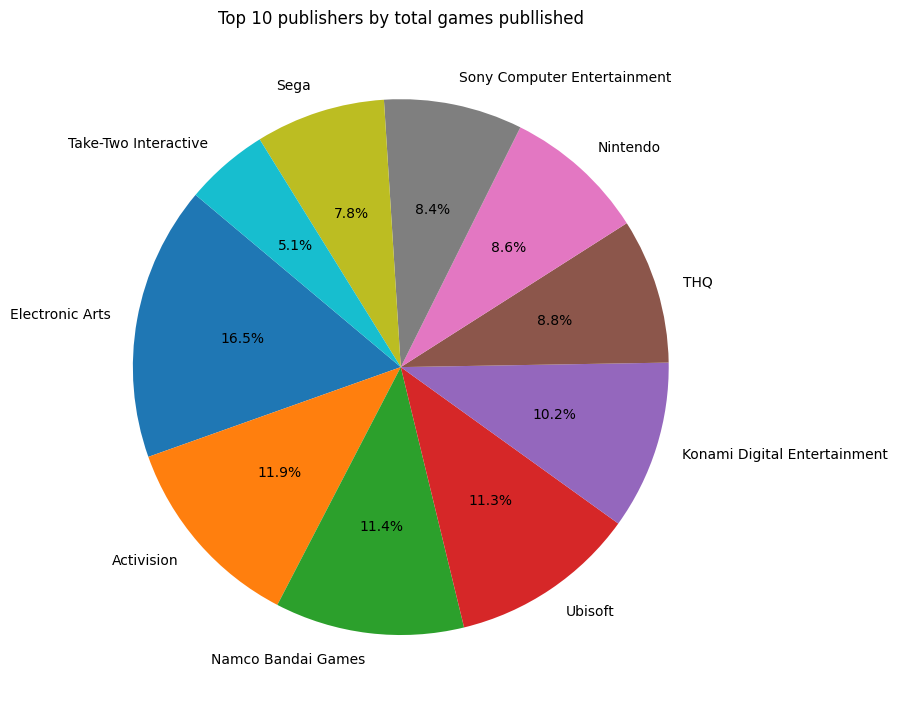

In [12]:
plt.figure(figsize=(9, 9))
plt.pie(top_publisher, labels=top_publisher .index, autopct='%1.1f%%', startangle=140)

plt.title('Top 10 publishers by total games publlished')
plt.tight_layout()
plt.show()

In [13]:
grouped_sales_pub = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
grouped_sales_pub_10 = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
grouped_sales_pub_10

,Global_Sales
Publisher,
Nintendo,1786.56
Electronic Arts,1110.32
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72
Take-Two Interactive,399.54
THQ,340.77
Konami Digital Entertainment,283.64
Sega,272.99


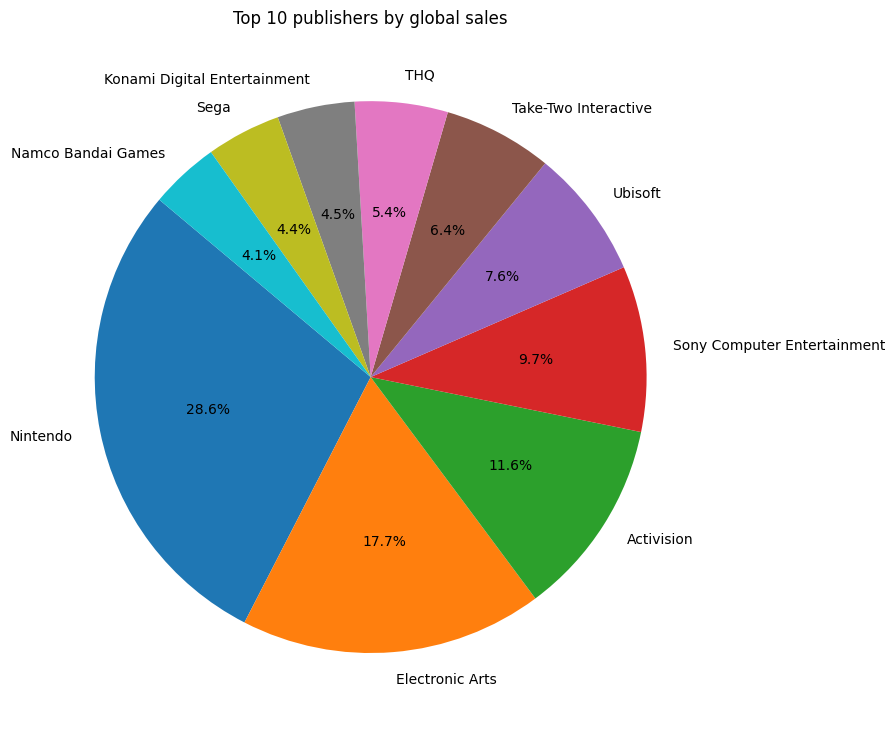

In [14]:
plt.figure(figsize=(9, 9))
plt.pie(grouped_sales_pub_10, labels=grouped_sales_pub_10.index, autopct='%1.1f%%', startangle=140)

plt.title('Top 10 publishers by global sales')
plt.tight_layout()
plt.show()

In [15]:
print("Num of publishers in dataset " + str(len(df['Publisher'].unique())))
print(" ")
list_publishers = pd.DataFrame(df['Publisher'].unique(),
                               columns=['Publisher Name'])

list_publishers

Num of publishers in dataset 578
 


,Publisher Name
0,Nintendo
1,Microsoft Game Studios
2,Take-Two Interactive
3,Sony Computer Entertainment
4,Activision
...,...
573,Inti Creates
574,Takuyo
575,Interchannel-Holon
576,Rain Games


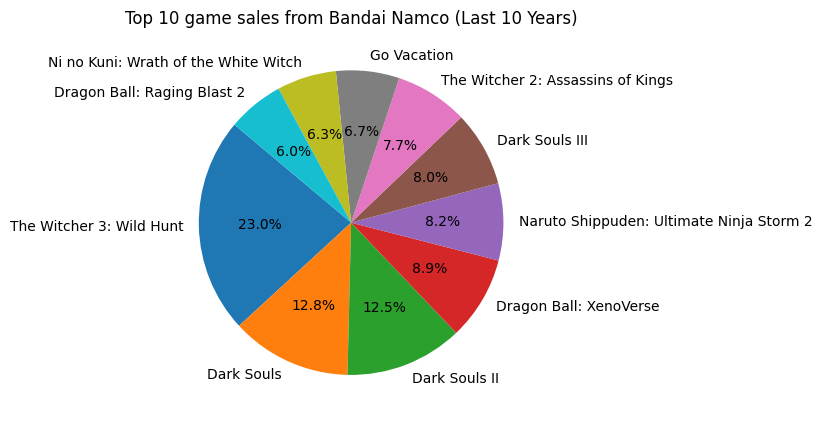

In [16]:
# Filter for publisher and last 10 years
recent_years = df['Year'].max() - 10
filtered = df[(df['Publisher'] == 'Namco Bandai Games') & (df['Year'] >= recent_years)]

# Group by product name and sum sales
product_sales = filtered.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False)

# Get top 10 products
top_10_products = product_sales.head(10)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_products, labels=top_10_products.index, autopct='%1.1f%%', startangle=140)

plt.title("Top 10 game sales from Bandai Namco (Last 10 Years)")
plt.tight_layout()
plt.show()

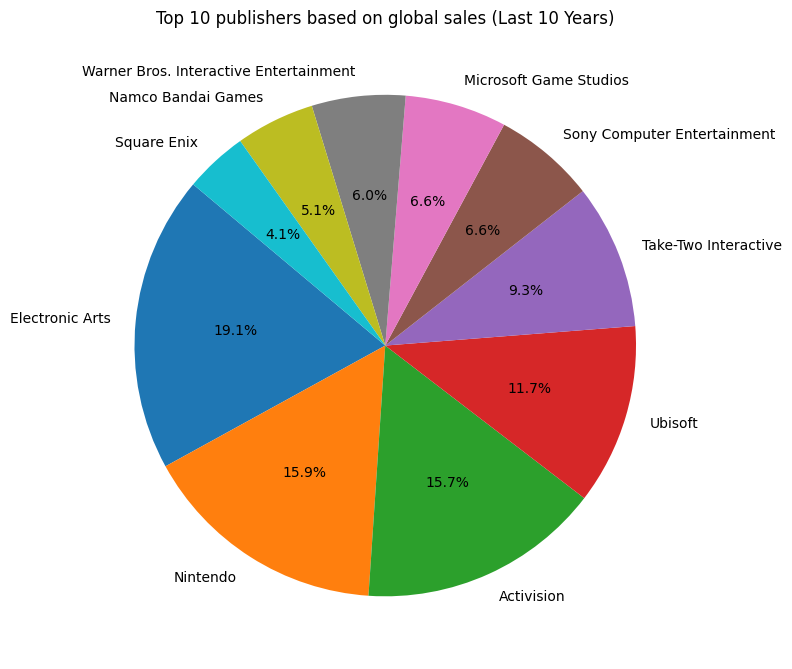

In [17]:
# Filter for publisher and last 10 years
recent_years = df['Year'].max() - 10
filtered = df[df['Year'] >= recent_years]

# Group by product name and sum sales
product_sales = filtered.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

# Get top 10 products
top_10_products = product_sales.head(10)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_products, labels=top_10_products.index, autopct='%1.1f%%', startangle=140)

plt.title("Top 10 publishers based on global sales (Last 10 Years)")
plt.tight_layout()
plt.show()

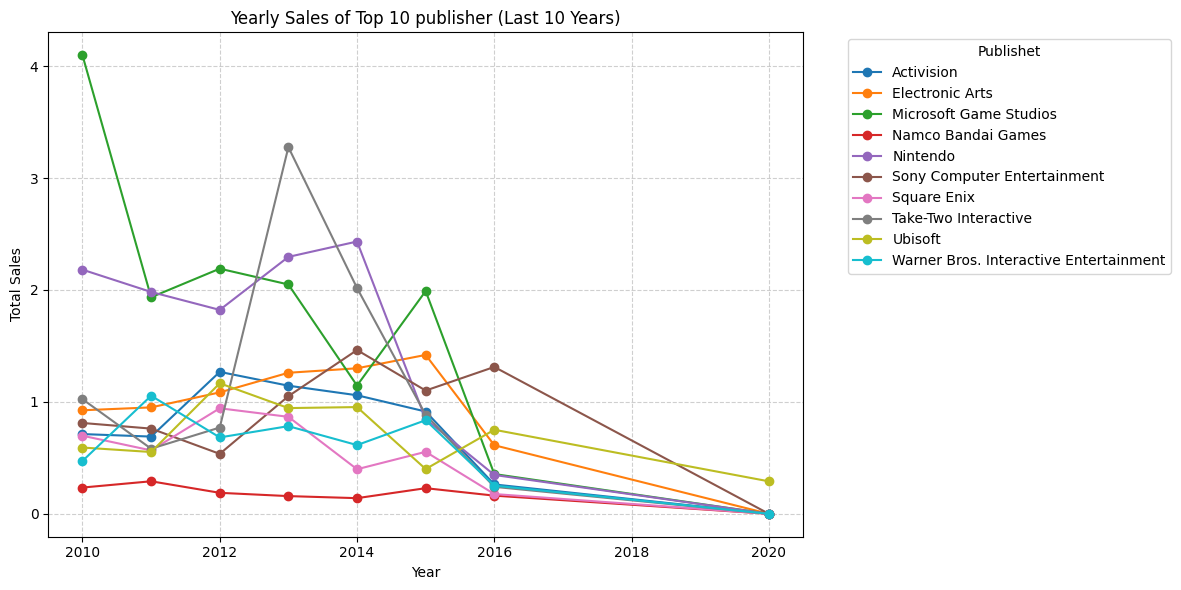

In [18]:
# Filter last 10 years
recent_years = df['Year'].max() - 10
filtered = df[df['Year'] >= recent_years]

# Find top 10 stores by total sales in this period
top_stores = (
    filtered.groupby('Publisher')['Global_Sales'].sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter again for only top 10 stores
filtered_top = filtered[filtered['Publisher'].isin(top_stores)]

# Group by store and year, sum sales
store_year_sales = (
    filtered_top.groupby(['Year', 'Publisher'])['Global_Sales']
    .mean()
    .unstack()  # Makes 'store' columns, 'year' as index
    .fillna(0)  # Fill missing combinations with 0
)

# Plot
plt.figure(figsize=(12, 6))
for store in store_year_sales.columns:
    plt.plot(store_year_sales.index, store_year_sales[store], label=store, marker='o')

plt.title('Yearly Sales of Top 10 publisher (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Publishet', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [19]:
df.columns
unnecessary_columns = ['Rank', 'Name']
possible_y = ['Global_Sales']

X = df.drop(columns = unnecessary_columns +possible_y)
y = df['Global_Sales']
X

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77
2,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31
3,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00
...,...,...,...,...,...,...,...,...
16593,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00
16594,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00
16595,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00
16596,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00


In [20]:
categorical_features = ['Platform', 'Genre', 'Publisher']

quantitative_features = ['Year','EU_Sales','JP_Sales','Other_Sales', 'NA_Sales']

quantitative_pipeline = Pipeline([
    ('scaler' , StandardScaler())
])

unique_values = []
for column in categorical_features:
    unique_values.append(list(df[column].unique()))

categorical_pipeline = Pipeline([
    ('encoder', OrdinalEncoder(categories = unique_values))
])

In [21]:
Xtrain , Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [22]:
preprocessor = ColumnTransformer([
    ('quantitative', quantitative_pipeline, quantitative_features),
    ('categorical' , categorical_pipeline, categorical_features)
])


Xtrain_processed = preprocessor.fit_transform(Xtrain)
Xtrain_processed = pd.DataFrame(Xtrain_processed, columns = quantitative_features + categorical_features)

Xtest_processed = preprocessor.transform(Xtest)
Xtest_processed = pd.DataFrame(Xtest_processed, columns = quantitative_features + categorical_features)

Xtest_processed

,Year,EU_Sales,JP_Sales,Other_Sales,NA_Sales,Platform,Genre,Publisher
0,-0.764345,-0.226092,-0.253848,-0.245772,-0.225069,8.0,8.0,5.0
1,-0.591530,-0.206874,-0.253848,-0.195076,-0.163979,13.0,8.0,7.0
2,0.963803,-0.283743,-0.028186,-0.245772,-0.322813,22.0,3.0,252.0
3,1.482247,0.254340,0.197476,0.058405,0.117036,19.0,3.0,0.0
4,1.482247,-0.130005,-0.253848,-0.144380,-0.200633,14.0,8.0,5.0
...,...,...,...,...,...,...,...,...
3303,0.618173,-0.053136,-0.253848,0.058405,0.459142,4.0,5.0,4.0
3304,0.099729,-0.283743,-0.221611,-0.245772,-0.322813,6.0,11.0,575.0
3305,-0.937160,-0.091571,0.004052,-0.093684,-0.176197,6.0,1.0,3.0
3306,-0.245901,0.446512,-0.253848,-0.042988,0.679067,13.0,8.0,4.0


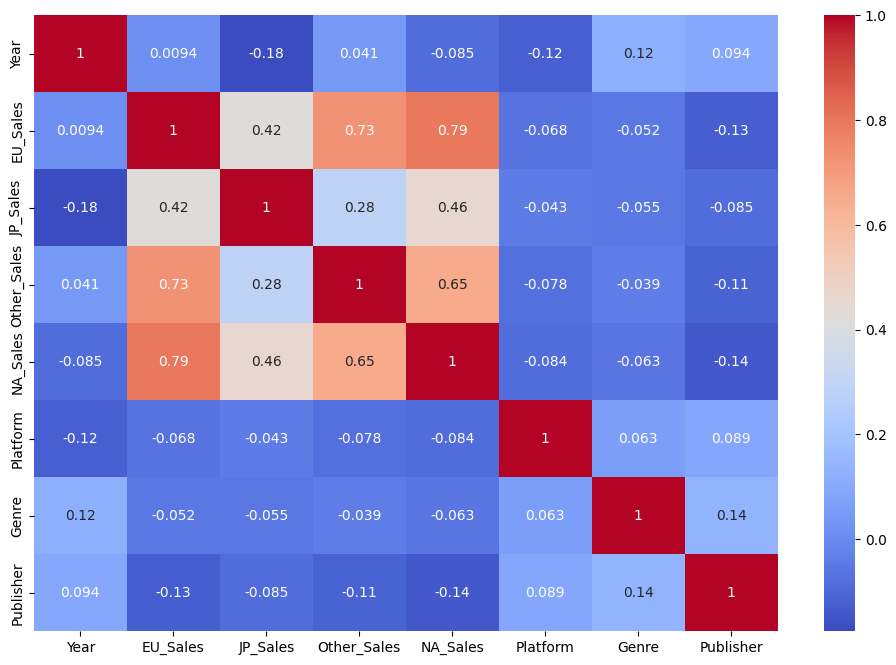


Start of Linear Colleration Ckecking
------------------------------------------------------------------------------------------
Other_Sales EU_Sales 0.7264963932492574
------------------------------------------------------------------------------------------
NA_Sales EU_Sales 0.7934218935926887
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
End of Linear Colleration Ckecking


The relatioship of features with the Target (Global_Sales):

               Y: P_value Linear_Relatioship
Year         7.025074e-16        Significant
EU_Sales     0.000000e+00        Significant
JP_Sales     0.000000e+00        Significant
Other_Sales  0.000000e+00        Significant
NA_Sales     0.000000e+00        Significant
Platform     2.921087e-22        Significant
Genre        5.922227e-14        Significant
Publisher    7.486065e-64        Significant


In [23]:
# Correlation Matrix:
correlation_matrix  = Xtrain_processed.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix , annot = True, cmap = "coolwarm")
plt.show()
plt.close()

print("\nStart of Linear Colleration Ckecking")
print("------------------------------------------------------------------------------------------")
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) > 0.7:
            print(correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i,j])
            print("------------------------------------------------------------------------------------------")
print("------------------------------------------------------------------------------------------")
print("End of Linear Colleration Ckecking\n\n")

#  F-statistic (F-Regression) Calculation:
threshold = 0.05
f_values, p_value = f_regression(Xtrain_processed, ytrain)
f_regression_df = pd.DataFrame(index = correlation_matrix.columns, data=p_value, columns = ['Y: P_value'])
f_regression_df['Linear_Relatioship'] = f_regression_df['Y: P_value'].apply(lambda pvalue: "Significant" if pvalue <= threshold else "Insignificant")
print(f"The relatioship of features with the Target (Global_Sales):\n\n{f_regression_df}")

In [24]:
mlp = MLPRegressor(hidden_layer_sizes=(30, 10), activation="relu",
                 solver='adam', alpha=0.0001,
                 batch_size='auto', learning_rate="constant",
                 learning_rate_init=0.001,
                 max_iter=200, n_iter_no_change = 100, tol=1e-4)
#
# Train the model
#
mlp.fit(Xtrain_processed, ytrain)

MLPRegressor(hidden_layer_sizes=(30, 10), n_iter_no_change=100)

In [25]:
# Make prediction
pred = mlp.predict(Xtest_processed)
#
# Calculate accuracy and error metrics
#
test_set_rsquared = mlp.score(Xtest_processed, ytest)
test_set_rmse = np.sqrt(mean_squared_error(ytest, pred))
#
# Print R_squared and RMSE value
#
print('R_squared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)

R_squared value:  0.9998243644570757
RMSE:  0.019056853569045597


In [26]:
with pd.ExcelWriter('output.xlsx') as writer:
    df.to_excel(writer, sheet_name='Clean', index=False)
    grouped_sales.to_excel(writer, sheet_name='Game Sales')
    grouped_sales_pub.to_excel(writer, sheet_name='Publisher Sales')